# Paris Agreement: Entry Into Force

In [80]:
%matplotlib inline

In [81]:
import matplotlib.pyplot as plt
import seaborn
from pandas_datapackage_reader import read_datapackage

Reading in the [data package](https://github.com/openclimatedata/paris-agreement-entry-into-force) with ratification status of the Paris Agreement.

In [82]:
parties = read_datapackage("https://github.com/openclimatedata/paris-agreement-entry-into-force")

/home/robert/.virtualenvs/notebooks/lib/python3.5/site-packages/tabulator/topen.py:108: UserWarning: Function "topen" is deprecated [v0.6-v1)
  warnings.warn(message, UserWarning)
/home/robert/.virtualenvs/notebooks/lib/python3.5/site-packages/tabulator/topen.py:119: UserWarning: Headers like "row1" is deprecated [v0.6-v1)
  warnings.warn(message, UserWarning)


In [83]:
parties.head()

,Name,Signature,Ratification-Acceptance-Approval,Kind,Emissions,Percentage,Year
Code,,,,,,,
AFG,Afghanistan,2016-04-22,NaT,NaN,19328.0,0.05,2005
ALB,Albania,2016-04-22,2016-09-21,Ratification,6717.0,0.02,2000
DZA,Algeria,2016-04-22,NaT,NaN,111023.0,0.30,2000
AND,Andorra,2016-04-22,NaT,NaN,522.0,0.00,2011
AGO,Angola,2016-04-22,NaT,NaN,61611.0,0.17,2005


In [84]:
parties.count()

Name                                197
Signature                           191
Ratification-Acceptance-Approval     81
Kind                                 81
Emissions                           191
Percentage                          191
Year                                191
dtype: int64

The European Union is contained as a block and as single parties so let's look at EU parties only.

In [85]:
eu28 = [
  'BEL',
  'BGR',
  'DNK',
  'DEU',
  'EST',
  'FIN',
  'FRA',
  'GRC',
  'IRL',
  'ITA',
  'HRV',
  'LVA',
  'LTU',
  'LUX',
  'MLT',
  'NLD',
  'AUT',
  'POL',
  'PRT',
  'ROU',
  'SWE',
  'SVK',
  'SVN',
  'ESP',
  'CZE',
  'HUN',
  'GBR',
  'CYP'
]
assert(len(eu28) == 28)

In [86]:
parties.loc[eu28]

,Name,Signature,Ratification-Acceptance-Approval,Kind,Emissions,Percentage,Year
Code,,,,,,,
BEL,Belgium,2016-04-22,NaT,NaN,119424.0,0.32,2013
BGR,Bulgaria,2016-04-22,NaT,NaN,55893.0,0.15,2013
DNK,Denmark,2016-04-22,NaT,NaN,56001.0,0.15,2013
DEU,Germany,2016-04-22,2016-10-05,Ratification,950673.0,2.56,2013
EST,Estonia,2016-04-22,NaT,NaN,21741.0,0.06,2013
FIN,Finland,2016-04-22,NaT,NaN,62989.0,0.17,2013
FRA,France,2016-04-22,2016-10-05,Ratification,496761.0,1.34,2013
GRC,Greece,2016-04-22,2016-10-14,Ratification,105111.0,0.28,2013
IRL,Ireland,2016-04-22,NaT,NaN,58755.0,0.16,2013


For the emissions shares the last available data submitted to the UNFCCC was used.

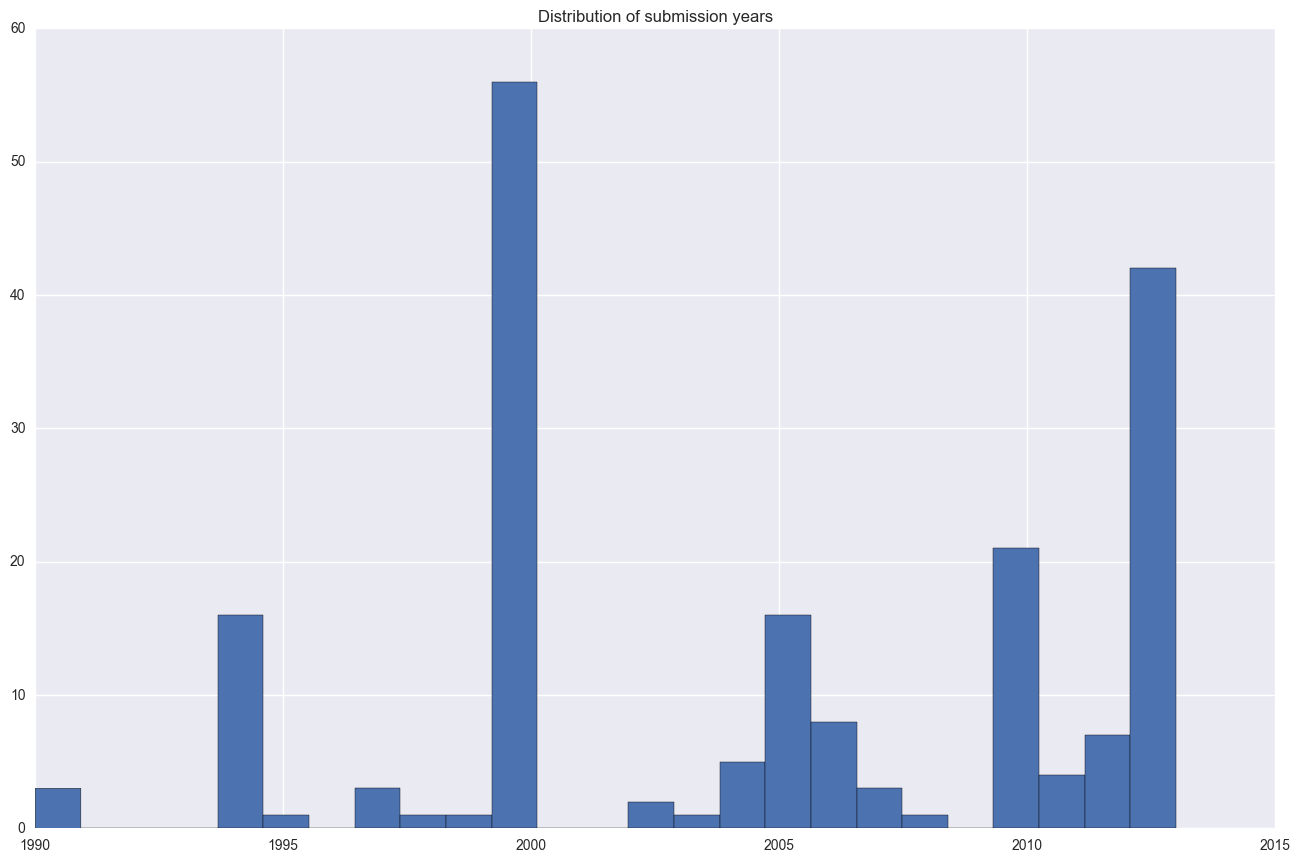

In [87]:
parties.Year.hist(bins=25 )
plt.title("Distribution of submission years")

And a look at how emissions are distributed, many countries with small shares.

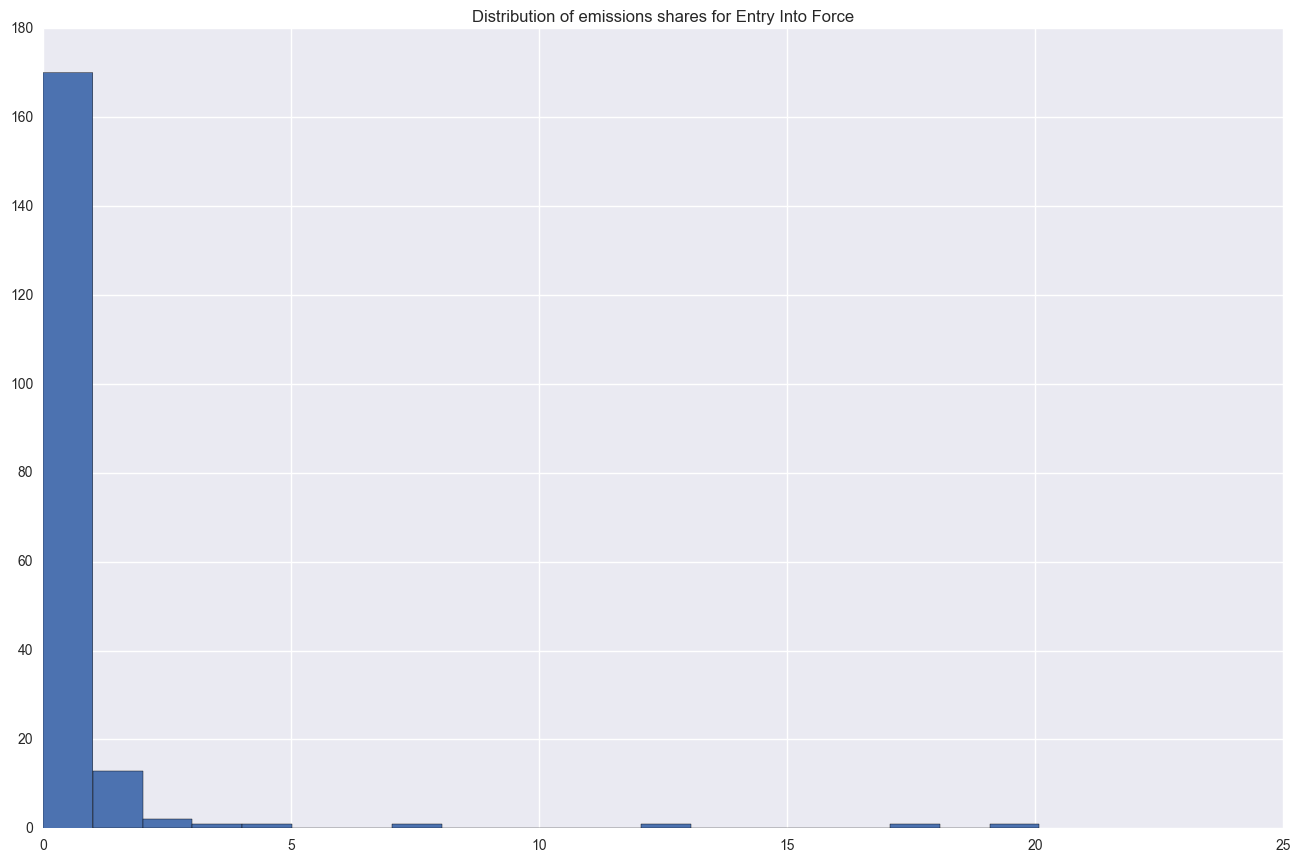

In [88]:
parties.Percentage.hist(bins=20)
plt.title("Distribution of emissions shares for Entry Into Force")

In [89]:
not_ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() != False]
ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() == False]

Sum of emissions of parties that have ratified, subtracting EU emissions to avoid double-counting.

In [90]:
print(ratified.Percentage.sum() - parties.loc["EU28"].Percentage)

60.43


A list of the ten highest emitters who have not yet ratified.

In [91]:
not_ratified.sort_values("Emissions", ascending=False).head(10)

,Name,Signature,Ratification-Acceptance-Approval,Kind,Emissions,Percentage,Year
Code,,,,,,,
RUS,Russian Federation,2016-04-22,NaT,NaN,2799434.0,7.53,2013
JPN,Japan,2016-04-22,NaT,NaN,1407800.0,3.79,2013
KOR,Republic of Korea,2016-04-22,NaT,NaN,688300.0,1.85,2012
GBR,United Kingdom of Great Britain and Northern I...,2016-04-22,NaT,NaN,575696.0,1.55,2013
IDN,Indonesia,2016-04-22,NaT,NaN,554334.0,1.49,2000
ZAF,South Africa,2016-04-22,NaT,NaN,544314.0,1.46,2010
AUS,Australia,2016-04-22,NaT,NaN,541924.0,1.46,2013
IRN,Iran (Islamic Republic of),2016-04-22,NaT,NaN,483669.0,1.30,2000
TUR,Turkey,2016-04-22,NaT,NaN,459102.0,1.24,2013
